In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [4]:
%pwd

'/Users/jenniecinelli/Desktop/HomeworkFolder/project_one/Folder3'

In [5]:
df = pd.read_csv("../Folder2/CDC_excessdeaths_cleaned.csv", index_col=0)
df.head()

,Date,Year,Week,State,Total_Deaths,Excess_Deaths,Covid_19_Deaths,Cum_Excess_Deaths,Cum_Covid_19_Deaths
0,2019-12-29T00:00:00.000,2019,52,United States,60171.0,-1203.42,1.0,-1203.42,1.0
1,2020-01-05T00:00:00.000,2020,1,United States,60725.0,-1821.75,0.0,-3025.17,1.0
2,2020-01-12T00:00:00.000,2020,2,United States,59352.0,-1780.56,2.0,-4805.73,3.0
3,2020-01-19T00:00:00.000,2020,3,United States,59153.0,-591.53,2.0,-5397.26,5.0
4,2020-01-26T00:00:00.000,2020,4,United States,58822.0,-588.22,0.0,-5985.48,5.0


In [6]:
cum_excess = df.loc[df["State"] == "United States"][["Cum_Excess_Deaths"]]
time = np.arange(len(cum_excess))
cum_excess
cum_covid19 = df.loc[df["State"] == "United States"][["Cum_Covid_19_Deaths"]]

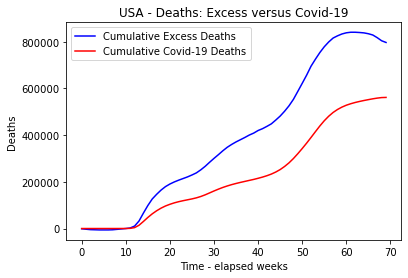

In [7]:
fig1 = plt.subplots(1,1)
plt.plot(time,cum_excess, color="blue", label="Cumulative Excess Deaths")
plt.plot(time,cum_covid19, color="red", label="Cumulative Covid-19 Deaths")
plt.title("USA - Deaths: Excess versus Covid-19")
plt.xlabel("Time - elapsed weeks")
plt.ylabel("Deaths")
plt.legend(loc="best")
plt.plot()
plt.savefig("../Folder4/Excess_Deaths_USA.png")

In [8]:
# Excess - Covid / Excess
df["Excess_Covid_Delta"] = ""
for index, row in df.iterrows():
    if row[7] == 0:
        df.loc[index,"Excess_Covid_Delta"] = 0
    else:
        df.loc[index,"Excess_Covid_Delta"] = 100*(row[7]-row[8])/row[7]
    

In [9]:
df.loc[lambda x: (x.State == "Minnesota") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()

46.06611843238459

<AxesSubplot:>

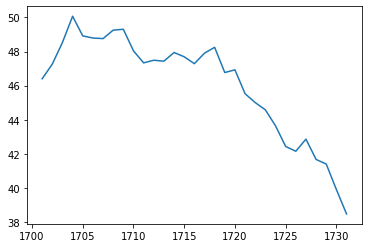

In [10]:
df.loc[lambda x: (x.State == "Minnesota") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].plot()

In [11]:
df.loc[lambda x: (x.State == "Utah") & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()

72.36231101774261

In [12]:
states = df["State"].unique()

In [13]:
Dict = {"States":[],"mean_discrepancy":[]}
for state in states:
    
    
    Dict["States"].append(us_state_abbrev[state])
    mean_discrepancy = df.loc[lambda x: (x.State == state) & (x.Week > 20) & (x.Week < 52)]["Excess_Covid_Delta"].mean()
    Dict["mean_discrepancy"].append(mean_discrepancy)

In [14]:
df_discrepancy = pd.DataFrame(Dict)
df_discrepancy.head(5)

,States,mean_discrepancy
0,USA,46.625414
1,AL,51.507938
2,AK,96.459996
3,AZ,67.417718
4,AR,57.634864


In [15]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
df_deathrate.head(20)

,States,Covid_Death_Rate
0,NaN,4.000000
1,NaN,2021.000000
2,State,NaN
3,RMI,0.000000
4,FSM,0.000000
5,AK,0.521335
6,UT,0.554209
7,VI,0.864000
8,NE,1.020306
9,VT,1.071802


In [16]:
df_merge = df_deathrate.merge(df_discrepancy, how='inner', on="States")

In [17]:
df_merge.head(60)

,States,Covid_Death_Rate,mean_discrepancy
0,AK,0.521335,96.459996
1,UT,0.554209,72.362311
2,NE,1.020306,15.802961
3,VT,1.071802,76.406625
4,ID,1.090293,65.585848
5,WI,1.143160,58.620658
6,WY,1.215988,93.932047
7,CO,1.231980,59.835387
8,MN,1.256834,46.066118
9,ME,1.274175,81.590526


In [18]:
df_merge.drop(index=[47,51], inplace=True)

<AxesSubplot:xlabel='mean_discrepancy', ylabel='Covid_Death_Rate'>

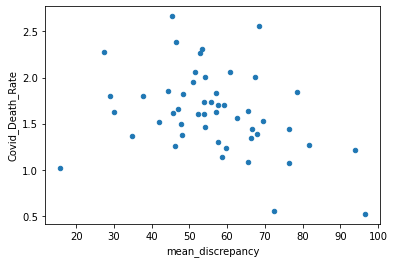

In [19]:
df_merge.plot.scatter("mean_discrepancy","Covid_Death_Rate")

In [20]:
mean_discrepancy = df_merge["mean_discrepancy"]
Covid_Death_Rate = df_merge["Covid_Death_Rate"]

In [21]:
df_merge

,States,Covid_Death_Rate,mean_discrepancy
0,AK,0.521335,96.459996
1,UT,0.554209,72.362311
2,NE,1.020306,15.802961
3,VT,1.071802,76.406625
4,ID,1.090293,65.585848
5,WI,1.143160,58.620658
6,WY,1.215988,93.932047
7,CO,1.231980,59.835387
8,MN,1.256834,46.066118
9,ME,1.274175,81.590526


In [ ]:
for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0]),({row[2]},{row[1]})

In [ ]:
plt.scatter(mean_discrepancy,Covid_Death_Rate)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mean_discrepancy, Covid_Death_Rate)
regress_values = mean_discrepancy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mean_discrepancy,Covid_Death_Rate)
plt.plot(mean_discrepancy,regress_values,"b-")
r_sqr = round(rvalue**2,2)
plt.annotate(line_eq,(25,0.75),fontsize=10,color="black")
plt.annotate(f"The r-squared is: {r_sqr}",(25,0.5),fontsize=10,color="black")
plt.xlabel('Mean Discrepancy % between Expected and Covid Deaths')
plt.ylabel('Covid Death Rate %')
plt.title("Mean Discrepancy % for weeks 20-52 for 2020")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")
for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))
plt.savefig("../Folder4/Excess_Deaths_Scatter.png")
plt.show()

In [ ]:
row[0]